In [1]:
import numpy as np
import os
import glob
from sklearn import utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
#from fast_ml.model_development import train_valid_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import  keras 

from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Model


In [2]:
path = 'C:/Users/Vipul Maingi/Downloads/neural/'

In [3]:
real_data=[]
x=[]   #Y

In [4]:
for i in os.listdir(path):

    data = np.load(path + i)
    real_data.append(data)
    name = i.split('_')[-1]
    name = name.split('.')[0]
    
    for j in range(data.shape[0]):
        x.append(name)

In [5]:
z = np.concatenate(real_data, axis =0)#x

In [6]:
z.shape

(2850976, 784)

In [7]:
names = ["alarm clock", "ant, bear", "bicycle", "bowtie", "calculator",
"camel", "car", "cat", "coffee cup", "crocodile", "crown", "dragon",
"duck", "elephant", "eye", "fan", "fish", "hand", "house"] #y

In [8]:
z,x = shuffle(z,x)

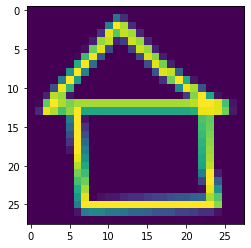

In [9]:
plt.imshow(z[2].reshape(28,28))

In [10]:
x_train = z[:100000]
y_train = x[:100000]
x_val =  z[100000:105000]
y_val =  x[100000:105000]
x_test = z[105000:125000]
y_test = x[105000:125000]

In [11]:

scaler = StandardScaler()
X_train= scaler.fit_transform(x_train)
X_val = scaler.fit_transform(x_val)
X_test = scaler.fit_transform(x_test)

In [12]:
category_names = ["alarm clock", "ant", "bear", "bicycle", "bowtie", "calculator",
"camel", "car", "cat", "coffee cup", "crocodile", "crown", "dragon",
"duck", "elephant", "eye", "fan", "fish", "hand", "house"]

f= {}
for i in range(len(category_names)):
    f[category_names[i]] = i

In [13]:
a= []
y_train_new = np.array(a)
y_test_new = np.array(a)
y_val_new = np.array(a)


for k in range(len(y_train)):
    y_train_new = np.append(y_train_new, f[y_train[k]])

for l in range(len(y_test)):
    y_test_new = np.append(y_test_new, f[y_test[l]])
    
for z in range(len(y_val)):
    y_val_new = np.append(y_val_new, f[y_val[z]])

In [14]:
y_train_tf = to_categorical(y_train_new)
y_test_tf = to_categorical(y_test_new)
y_val_tf = to_categorical(y_val_new)

In [15]:
x_train_normalized = tf.reshape(X_train, [100000, 28, 28, 1])
x_validation_normalized = tf.reshape(X_val, [5000, 28, 28, 1])
x_test_normalized = tf.reshape(X_test, [20000, 28, 28, 1])

In [16]:
# X_train = tf.convert_to_tensor(x_train_normalized)
# Y_train = tf.convert_to_tensor(y_train_new)
# # X_val =tf.convert_to_tensor(x_validation_normalized)
# Y_val = tf.convert_to_tensor(y_val_tf) 
# # X_test = tf.convert_to_tensor(x_test_normalized)
# Y_test = tf.convert_to_tensor(y_test_tf)

In [17]:
from keras.layers import Conv2D,MaxPool2D

#np.random.seed(13) #To obtain consistent and reproducible data

# This is deep convolutional NN with 6 convolutional layers, 3 MaxPool layers
# and one dense layer. Run (on Colab with GPU) and see the difference in 
# performance compared to smaller convolutional model, and the dense model
# First, Run this model as is, and examine the test set error rate

from functools import partial
from keras import regularizers

activeList=['relu','elu', 'sigmoid','leaky_relu']
act=activeList[0]
initialList=['he_normal','he_uniform','glorot_normal','glorot_uniform',\
             'lecun_normal','lecun_uniform']
init=initialList[0]
optimList=['rmsprop','adam','nadam','sgd']
optim=optimList[2]

ConvLayer=partial(Conv2D,activation=act, 
                  kernel_initializer=init, 
                  kernel_regularizer=regularizers.l2(0.001),
                  strides=1,
                  padding='same')
# First set of two Conv2D and one MaxPool2D layer
# Run this first

inputLayer=Input(shape=(28,28,1)) 
tmp=ConvLayer(filters=32,kernel_size=(3,3))(inputLayer)
tmp=ConvLayer(filters=32,kernel_size=(3,3))(tmp)
tmp=MaxPool2D((2,2))(tmp)
tmp=BatchNormalization()(tmp)
#tmp=Dropout(p)(tmp)
# Second set of two Conv2D and one MaxPool2D layer
# Run this Next and observe how much better the test error get, if any
tmp=ConvLayer(filters=64,kernel_size=(3,3))(tmp)
tmp=ConvLayer(filters=64,kernel_size=(3,3))(tmp)
tmp=MaxPool2D((2,2))(tmp)
tmp=BatchNormalization()(tmp)
#tmp=Dropout(p)(tmp)# Third set of two Conv2D and one MaxPool2D layer
# Run this Next and observe how much better the test error get, if any
tmp=ConvLayer(filters=128,kernel_size=(3,3))(tmp)
tmp=ConvLayer(filters=128,kernel_size=(3,3))(tmp)
tmp=MaxPool2D((2,2))(tmp)
tmp=BatchNormalization()(tmp)
#tmp=Dropout(p)(tmp)
# tmp=Flatten()(tmp)
tmp=ConvLayer(filters=128,kernel_size=(3,3))(tmp)
tmp=ConvLayer(filters=128,kernel_size=(3,3))(tmp)
tmp=MaxPool2D((2,2))(tmp)
tmp=BatchNormalization()(tmp)
tmp=Flatten()(tmp)
tmp=Dense(128,activation='relu',kernel_initializer='he_uniform')(tmp)
tmp=Dropout(0.4)(tmp)
# tmp=Dense(128,activation='relu',kernel_initializer='he_uniform')(tmp)
# tmp=Dropout(0.4)(tmp)
outputLayer=Dense(units=20,activation='softmax')(tmp)

network=Model(inputLayer,outputLayer)

network.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])

network.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [18]:
earlyStoppingCB=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history=network.fit(x_train_normalized, y_train_tf, validation_data=(x_validation_normalized,y_val_tf),callbacks=[earlyStoppingCB],epochs=20,batch_size=128)
test_loss, test_acc=network.evaluate(x_test_normalized, y_test_tf)
print(f"test_acc: {test_acc:5.3}")

Epoch 1/20
782/782 [==============================] - 198s 254ms/step - loss: 2.1281 - accuracy: 0.7464 - val_loss: 1.7744 - val_accuracy: 0.7680
Epoch 2/20
782/782 [==============================] - 184s 235ms/step - loss: 1.3092 - accuracy: 0.8570 - val_loss: 1.1244 - val_accuracy: 0.8596
Epoch 3/20
782/782 [==============================] - 182s 233ms/step - loss: 0.9758 - accuracy: 0.8754 - val_loss: 1.2716 - val_accuracy: 0.7740
Epoch 4/20
782/782 [==============================] - 197s 252ms/step - loss: 0.8213 - accuracy: 0.8817 - val_loss: 1.0319 - val_accuracy: 0.8092
Epoch 5/20
782/782 [==============================] - 1317s 2s/step - loss: 0.7433 - accuracy: 0.8878 - val_loss: 0.8405 - val_accuracy: 0.8512
Epoch 6/20
782/782 [==============================] - 229s 293ms/step - loss: 0.7044 - accuracy: 0.8927 - val_loss: 0.7172 - val_accuracy: 0.8834
Epoch 7/20
782/782 [==============================] - 238s 305ms/step - loss: 0.6782 - accuracy: 0.8956 - val_loss: 0.8733 - v